In [1]:
#%config Completer.use_jedi=False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

In [3]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
url="https://raw.githubusercontent.com/aslanismailgit/HeartDisease/master/heart.csv"
df = pd.read_csv(url)
#df = pd.read_csv(url)
df.shape

(303, 14)

In [ ]:
"""
Name="heart.csv"
path="/home/samsung-ub/Desktop/Pyhton/Datasets/"
dataNameandPath = os.path.join("r",path, Name)
df = pd.read_csv("../Datasets/"+Name)
"""

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
features=df.columns[0:-1]
X_o=df[features]
y=df.target
print(X_o.shape)
print(y.shape)

(303, 13)
(303,)


## Change categorical variables with dummy varibles columns

In [23]:
# 'cp', 'thal' and 'slope' 
df['cp'] = df['cp'].astype('category')
df['thal'] = df['thal'].astype('category')
df['slope'] = df['slope'].astype('category')

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frm = [X_o,a, b, c]
X_wCatVar = pd.concat(frm, axis = 1)

X = X_wCatVar.drop(columns = ['cp', 'thal', 'slope'])

print ('Number of Features in original data : {}'.format(X_o.shape[1]))
print ('Number of Features added with categorical data : {}'.format(X_wCatVar.shape[1]))
print ('Number of Features after original categorical features removed : {}'.format(X.shape[1]))


Number of Features in original data : 13
Number of Features added with categorical data : 24
Number of Features after original categorical features removed : 21


In [26]:
Negatives = df.target.value_counts()[0]
Positives = df.target.value_counts()[1]
print('Number of Negatives in original data : {}'.format(Negatives))
print('Number of Positives in original data : {}'.format(Positives))

Number of Negatives in original data : 138
Number of Positives in original data : 165


In [27]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_lin_pred = lda.fit(X, y).predict(X)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_q_pred = qda.fit(X, y).predict(X) 

/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Model efficiency metrics

In [29]:
cm_lin = confusion_matrix(y, y_lin_pred) 

print("== Manual method =====")
print("======================")
print("Accuracy   LDA: {:.3f}".format(((cm_lin[1,1])+cm_lin[0,0])/(sum(cm_lin[:,0])+sum(cm_lin[:,1]))))
print("TP - recallLDA: {:.3f}".format(cm_lin[1,1]/sum(cm_lin[1,:])))
print("TN         LDA: {:.3f}".format(cm_lin[0,0]/sum(cm_lin[0,:])))
print("Precision  LDA: {:.3f}".format(cm_lin[1,1]/((cm_lin[0,1]+cm_lin[1,1]))))

precision,recall,fscore,support=score(y, y_lin_pred)
print()
print("== Imported method =")
print("=====================")
print ('Precision LDA: {:.3f}'.format(precision[1]))
print ('Recall-TP LDA: {:.3f}'.format(recall[1]))
print ('F-score   LDA: {:.3f}'.format(fscore[1]))
print ('Support   LDA: {:.3f}'.format(support[1])) 


== Manual method =====
Accuracy   LDA: 0.855
TP - recallLDA: 0.909
TN         LDA: 0.790
Precision  LDA: 0.838

== Imported method =
Precision LDA: 0.838
Recall-TP LDA: 0.909
F-score   LDA: 0.872
Support   LDA: 165.000


In [30]:
cm_qda = confusion_matrix(y, y_q_pred) 
print ('Confusion Matrix QDA:')
print(cm_qda) 
#print ('\nAccuracy Score QDA:',accuracy_score(y, y_q_pred)) 
#print ('\nReport QDA: ')
#print (classification_report(y, y_q_pred)) 

Confusion Matrix QDA:
[[ 26 112]
 [ 11 154]]


In [31]:
precision,recall,fscore,support=score(y, y_q_pred)
print()
print ('Precision : {:.3f}'.format(precision[1]))
print ('Recall-TP : {:.3f}'.format(recall[1]))
print ('F-score   : {:.3f}'.format(fscore[1]))
print ('Support   : {:.3f}'.format(support[1])) 


Precision : 0.579
Recall-TP : 0.933
F-score   : 0.715
Support   : 165.000


### Split train and test sets

In [32]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227, 21)
(227,)
(76, 21)
(76,)


In [34]:
lda_t = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_lin_pred_t = lda_t.fit(X_train, y_train).predict(X_test)

qda_t = QuadraticDiscriminantAnalysis(store_covariance=True)
y_q_pred_t = qda_t.fit(X_train, y_train).predict(X_test)

/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [35]:
cm_lin_t = confusion_matrix(y_test, y_lin_pred_t) 
cm_qda_t = confusion_matrix(y_test, y_q_pred_t) 

### Dimensiality reduction - PCA

In [36]:
from sklearn.decomposition import PCA
acc_lin_1=[]
acc_q_1=[]
inx_1=[]
TP_lin_1=[]
TP_q_1=[]
for i in range(1,X.shape[1]):
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_data, y, random_state=0)
    
    lda_t = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_lin_pred_t = lda_t.fit(X_train, y_train).predict(X_test)

    qda_t = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_q_pred_t = qda_t.fit(X_train, y_train).predict(X_test)
    
    inx_1.append(i)
    acc_lin_1.append(accuracy_score(y_test, y_lin_pred_t))
    acc_q_1.append(accuracy_score(y_test, y_q_pred_t))

    precision,recall,fscore,support=score(y_test, y_lin_pred_t)
    TP_lin_1.append(recall[1])
    
    precision,recall,fscore,support=score(y_test, y_q_pred_t)
    TP_q_1.append(recall[1])

/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


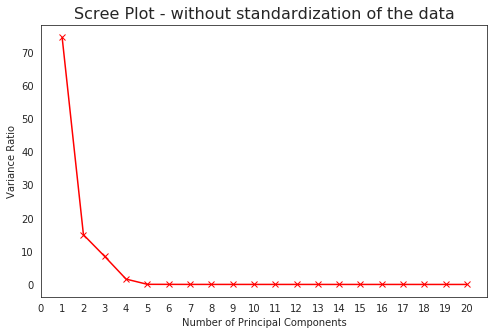

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
#f=plt.figure(figsize=(10, 5))
var_exp_1=(pca.explained_variance_ratio_*100)
q=np.linspace(1, len(var_exp_1), len(var_exp_1))
ax.plot(q, var_exp_1,'rx-',label='Explained Variace Ratio')
ax.set_xticks(np.arange(0, 21, step=1))
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance Ratio")
ax.set_title("Scree Plot - without standardization of the data",fontsize=16)
#ax.legend()
plt.savefig("Scree Plot before std.png")
plt.show()

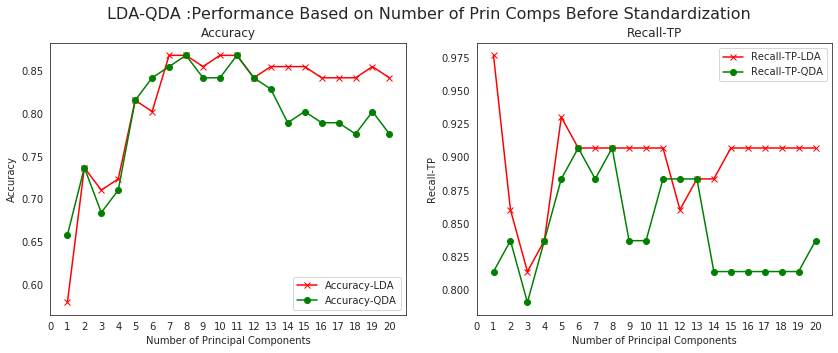

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(14, 5))

q=np.linspace(1, len(acc_lin_1), len(acc_lin_1))
ax1.plot(q, acc_lin_1,'rx-',label='Accuracy-LDA')
ax1.plot(q, acc_q_1, 'go-',label='Accuracy-QDA')
ax1.set_xlabel("Number of Principal Components")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(np.arange(0, 21, step=1))
#ax1.set_xlim(0, 10)
#ax1.set_ylim(0.7, .90)
ax1.set_title("Accuracy")
ax1.legend()

ax2.plot(q, TP_lin_1,'rx-',label='Recall-TP-LDA')
ax2.plot(q, TP_q_1, 'go-',label='Recall-TP-QDA')
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Recall-TP")
ax2.set_title("Recall-TP")
ax2.set_xticks(np.arange(0, 21, step=1))
ax2.legend()
f.suptitle('LDA-QDA :Performance Based on Number of Prin Comps Before Standardization', fontsize=16)
plt.savefig("LDA QDA  Performanve before std.png")
plt.show()

### Standardization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(X)

In [41]:
from sklearn.decomposition import PCA
acc_lin_2=[]
acc_q_2=[]
inx_2=[]
TP_lin_2=[]
TP_q_2=[]
for i in range(1,X_std.shape[1]):
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(X_std)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_data, y, random_state=0)
    
    lda_t = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_lin_pred_t = lda_t.fit(X_train, y_train).predict(X_test)

    qda_t = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_q_pred_t = qda_t.fit(X_train, y_train).predict(X_test)
    
    inx_2.append(i)
    acc_lin_2.append(accuracy_score(y_test, y_lin_pred_t))
    acc_q_2.append(accuracy_score(y_test, y_q_pred_t))

    cm_lin_t = confusion_matrix(y_test, y_lin_pred_t) 
    cm_q_t = confusion_matrix(y_test, y_q_pred_t) 
  
    precision,recall,fscore,support=score(y_test, y_lin_pred_t)
    TP_lin_2.append(recall[1])
    
    precision,recall,fscore,support=score(y_test, y_q_pred_t)
    TP_q_2.append(recall[1])

/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/samsung-ub/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


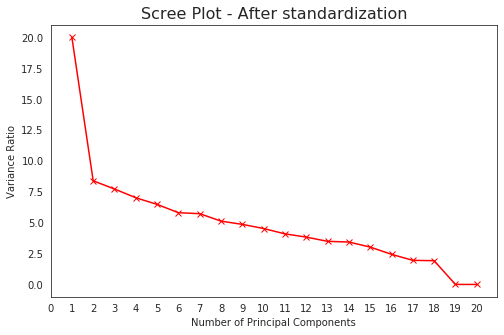

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
#f=plt.figure(figsize=(10, 5))

var_exp_2=(pca.explained_variance_ratio_*100)
q=np.linspace(1, len(var_exp_2), len(var_exp_2))
ax.plot(q, var_exp_2,'rx-',label='Explained Variace Ratio')
ax.set_xticks(np.arange(0, 21, step=1))
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance Ratio")
ax.set_title("Scree Plot - After standardization",fontsize=16)
plt.savefig("Scree Plot after std.png")
#ax.legend()
plt.show()

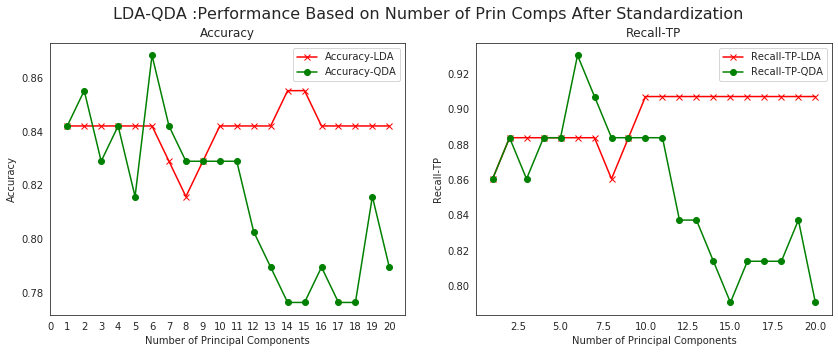

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(14, 5))

q=np.linspace(1, len(acc_lin_2), len(acc_lin_2))
ax1.plot(q, acc_lin_2,'rx-',label='Accuracy-LDA')
ax1.plot(q, acc_q_2, 'go-',label='Accuracy-QDA')
ax1.set_xlabel("Number of Principal Components")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(np.arange(0, 21, step=1))
#ax1.set_xlim(0, 10)
#ax1.set_ylim(0.7, .90)
ax1.set_title("Accuracy")
ax1.legend()

ax2.plot(q, TP_lin_2,'rx-',label='Recall-TP-LDA')
ax2.plot(q, TP_q_2, 'go-',label='Recall-TP-QDA')
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Recall-TP")
ax2.set_title("Recall-TP")
ax1.set_xticks(np.arange(0, 21, step=1))
ax2.legend()
f.suptitle('LDA-QDA :Performance Based on Number of Prin Comps After Standardization', fontsize=16)
plt.savefig("LDA QDA Performance after std.png")
plt.show()

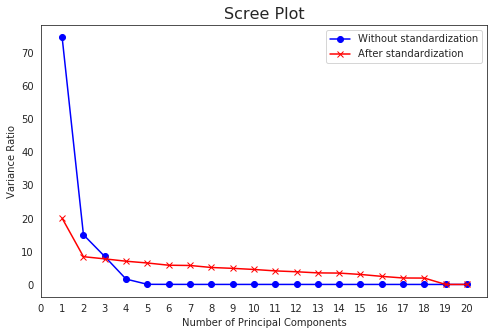

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
#f=plt.figure(figsize=(10, 5))

var_exp_2=(pca.explained_variance_ratio_*100)
q=np.linspace(1, len(var_exp_2), len(var_exp_2))
ax.plot(q, var_exp_1,'bo-',label='Without standardization')
ax.plot(q, var_exp_2,'rx-',label='After standardization')
ax.set_xticks(np.arange(0, 21, step=1))
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance Ratio")
ax.set_title("Scree Plot",fontsize=16)
ax.legend()
plt.savefig("Scree Plot before and after.png")
plt.show()

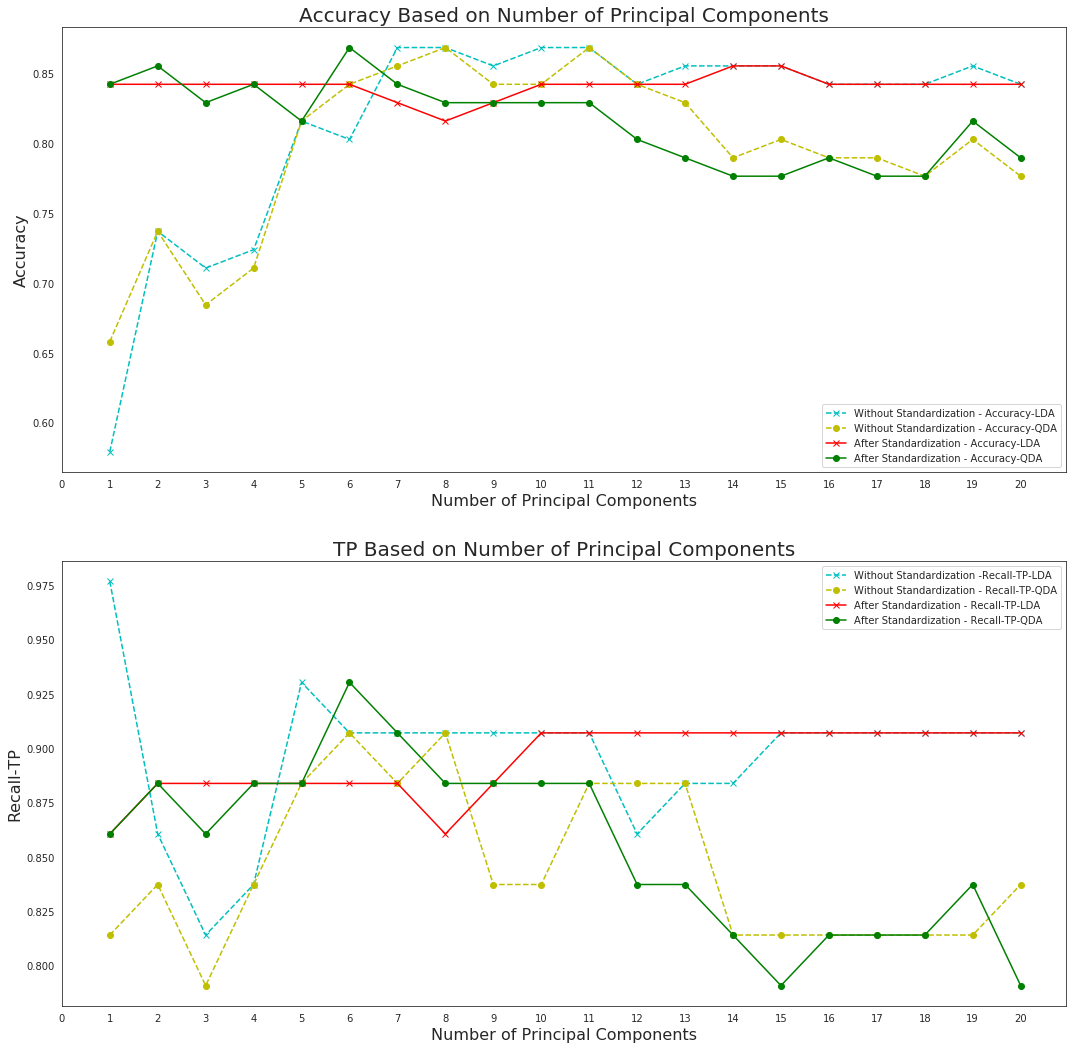

In [45]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False,figsize=(18, 18))
q=np.linspace(1, len(TP_lin_1), len(TP_lin_1))
ax1.plot(q, acc_lin_1,'cx--',label='Without Standardization - Accuracy-LDA')
ax1.plot(q, acc_q_1, 'yo--',label='Without Standardization - Accuracy-QDA')

ax1.plot(q, acc_lin_2,'rx-',label='After Standardization - Accuracy-LDA')
ax1.plot(q, acc_q_2, 'go-',label='After Standardization - Accuracy-QDA')

ax1.set_xlabel("Number of Principal Components",fontsize=16)
ax1.set_ylabel("Accuracy",fontsize=16)
ax1.set_xticks(np.arange(0, 21, step=1))
#ax1.set_xlim(0, 10)
#ax1.set_ylim(0.7, .90)
#ax1.set_title("Accuracy")
ax1.legend()

ax2.plot(q, TP_lin_1,'cx--',label='Without Standardization -Recall-TP-LDA')
ax2.plot(q, TP_q_1, 'yo--',label='Without Standardization - Recall-TP-QDA')

ax2.plot(q, TP_lin_2,'rx-',label='After Standardization - Recall-TP-LDA')
ax2.plot(q, TP_q_2, 'go-',label='After Standardization - Recall-TP-QDA')

ax2.set_xlabel("Number of Principal Components",fontsize=16)
ax2.set_ylabel("Recall-TP",fontsize=16)
#ax2.set_title("Recall-TP")
ax2.legend()
#f.suptitle('Performance Based on Number of Principal Components After Standardization', fontsize=16)
ax1.set_title('Accuracy Based on Number of Principal Components', fontsize=20)
ax2.set_title('TP Based on Number of Principal Components', fontsize=20)
ax2.set_xticks(np.arange(0, 21, step=1))
plt.savefig("Performance Plot before and after.png")
plt.show()

## K-MEANS

In [46]:
from sklearn.cluster import KMeans

acc_k=[]
inx_k=[]
TP_k=[]
for i in range(1,X_std.shape[1]):
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(X_std)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_data, y, random_state=0)
    
    kmeans = KMeans(n_clusters=2)
    y_k_pred_t=kmeans.fit(X_train).predict(X_test)
    
    inx_k.append(i)
    acc_k.append(accuracy_score(y_test, y_k_pred_t))
 
    cm_k_t = confusion_matrix(y_test, y_k_pred_t) 
  
    precision,recall,fscore,support=score(y_test, y_k_pred_t)
    TP_k.append(recall[1])

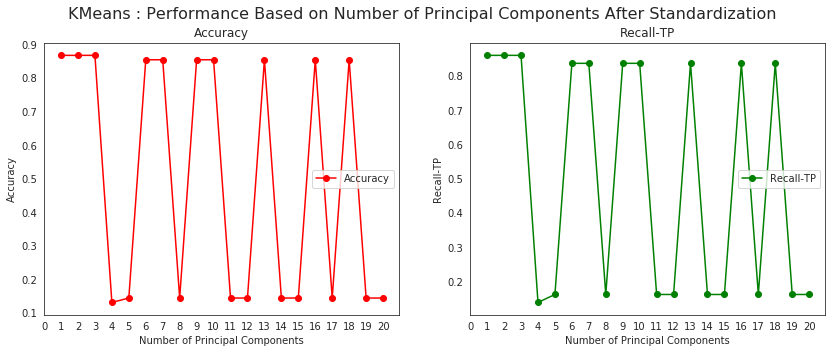

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(14, 5))

q=np.linspace(1, len(acc_k), len(acc_k))
ax1.plot(q, acc_k,'ro-',label='Accuracy')
ax1.set_xticks(np.arange(0, 21, step=1))

ax1.set_xlabel("Number of Principal Components")
ax1.set_ylabel("Accuracy")
#ax1.set_xlim(0, 20)
#ax1.set_ylim(0.7, .90)
ax1.set_title("Accuracy")
ax1.legend()


ax2.plot(q, TP_k, 'go-',label='Recall-TP')
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Recall-TP")
ax2.set_title("Recall-TP")
ax2.legend()
ax2.set_xticks(np.arange(0, 21, step=1))
f.suptitle('KMeans : Performance Based on Number of Principal Components After Standardization', fontsize=16)
plt.savefig("K Means:Performance after standardization.png")
plt.show()

In [48]:
print("Max Accuracy")
print("___________________________________")
print ('Max Accuracy - LDA: {:.3f}'.format(max(acc_lin_1)))
print("Number of Principal Compenents :{}" .format(acc_lin_1.index(max(acc_lin_1))+1))
print ('Max Accuracy - LDA-Std: {:.3f}'.format(max(acc_lin_2)))
print("Number of Principal Compenents :{}" .format(acc_lin_1.index(max(acc_lin_2))+1))
print ('Max Accuracy - QDA: {:.3f}'.format(max(acc_q_1)))
print("Number of Principal Compenents :{}" .format(acc_lin_1.index(max(acc_q_1))+1))
print ('Max Accuracy - QDA-Std: {:.3f}'.format(max(acc_q_2)))
print("Number of Principal Compenents :{}" .format(acc_lin_1.index(max(acc_q_2))+1))
print ('Max Accuracy - KMeans: {:.3f}'.format(max(acc_k)))
print("Number of Principal Compenents :{}" .format(acc_lin_1.index(max(acc_k))+1))
print()
print("Max Recall-TP")
print("___________________________________")
print ('Max Recall-TP - LDA: {:.3f} '.format(max(TP_lin_1)))
print("Number of Principal Compenents :{}" .format(TP_lin_1.index(max(TP_lin_1))+1))
print ('Max Recall-TP - LDA-Std: {:.3f}'.format(max(TP_lin_2)))
print("Number of Principal Compenents :{}" .format(TP_lin_1.index(max(TP_lin_2))+1))
print ('Max Recall-TP - QDA: {:.3f}'.format(max(TP_q_1)))
print("Number of Principal Compenents :{}" .format(TP_lin_1.index(max(TP_q_1))+1))
print ('Max Recall-TP - QDA-Std: {:.3f}'.format(max(TP_q_2)))
print("Number of Principal Compenents :{}" .format(TP_lin_1.index(max(TP_q_2))+1))
print ('Max Recall-TP - KMeans: {:.3f}'.format(max(TP_k)))
print("Number of Principal Compenents :{}" .format(TP_lin_1.index(max(TP_k))+1))

Max Accuracy
___________________________________
Max Accuracy - LDA: 0.868
Number of Principal Compenents :7
Max Accuracy - LDA-Std: 0.855
Number of Principal Compenents :9
Max Accuracy - QDA: 0.868
Number of Principal Compenents :7
Max Accuracy - QDA-Std: 0.868
Number of Principal Compenents :7
Max Accuracy - KMeans: 0.868
Number of Principal Compenents :7

Max Recall-TP
___________________________________
Max Recall-TP - LDA: 0.977 
Number of Principal Compenents :1
Max Recall-TP - LDA-Std: 0.907
Number of Principal Compenents :6
Max Recall-TP - QDA: 0.907
Number of Principal Compenents :6
Max Recall-TP - QDA-Std: 0.930
Number of Principal Compenents :5
Max Recall-TP - KMeans: 0.860
Number of Principal Compenents :2
